In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# ============================================
# SUPPRESS ALL COMMON WARNINGS (CLEAN OUTPUT)
# ============================================

import os
import warnings
import logging

# 1. Suppress Python warnings
warnings.filterwarnings("ignore")

# 2. Suppress TensorFlow INFO & WARNING messages
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"   # 0 = all logs, 1 = filter INFO, 2 = filter WARNING, 3 = filter ERROR

# 3. Suppress TensorFlow deprecation warnings
tf_logger = logging.getLogger("tensorflow")
tf_logger.setLevel(logging.ERROR)

# 4. Suppress matplotlib warnings (optional)
logging.getLogger("matplotlib").setLevel(logging.ERROR)

print("✅ All warnings suppressed successfully!")


✅ All warnings suppressed successfully!


✅ TensorFlow Version: 2.18.0
✅ Total Images: 2839
✅ Class Distribution:
 class
normal         1187
osteoprosis    1173
osteopenia      479
Name: count, dtype: int64
✅ Training Samples: 2271
✅ Validation Samples: 568
✅ Class Weights: {'normal': 0.7968421052631579, 'osteopenia': 1.9765013054830287, 'osteoprosis': 0.8070362473347548}
Found 2271 validated image filenames belonging to 3 classes.
Found 568 validated image filenames belonging to 3 classes.
✅ Detected Classes: {'normal': 0, 'osteopenia': 1, 'osteoprosis': 2}


I0000 00:00:1765084898.024344      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765084898.025021      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,156,483 (76.89 MB)

 Trainable params: 9,571,331 (36.51 MB)

 Non-trainable params: 10,585,152 (40.38 MB)

Epoch 1/40


I0000 00:00:1765084904.349673     118 service.cc:148] XLA service 0x7f9c2c006260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765084904.350550     118 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765084904.350572     118 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765084904.868541     118 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/142 ━━━━━━━━━━━━━━━━━━━━ 28:17 12s/step - accuracy: 0.2500 - loss: 1.4221

I0000 00:00:1765084913.451155     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


142/142 ━━━━━━━━━━━━━━━━━━━━ 150s 981ms/step - accuracy: 0.4669 - loss: 1.0347 - val_accuracy: 0.7095 - val_loss: 0.6765 - learning_rate: 1.0000e-04
Epoch 2/40
142/142 ━━━━━━━━━━━━━━━━━━━━ 78s 550ms/step - accuracy: 0.6651 - loss: 0.7469 - val_accuracy: 0.7077 - val_loss: 0.6282 - learning_rate: 1.0000e-04
Epoch 3/40
142/142 ━━━━━━━━━━━━━━━━━━━━ 76s 537ms/step - accuracy: 0.6751 - loss: 0.7313 - val_accuracy: 0.7394 - val_loss: 0.6155 - learning_rate: 1.0000e-04
Epoch 4/40
142/142 ━━━━━━━━━━━━━━━━━━━━ 78s 548ms/step - accuracy: 0.6887 - loss: 0.6870 - val_accuracy: 0.7482 - val_loss: 0.5977 - learning_rate: 1.0000e-04
Epoch 5/40
142/142 ━━━━━━━━━━━━━━━━━━━━ 77s 539ms/step - accuracy: 0.7164 - loss: 0.6179 - val_accuracy: 0.7430 - val_loss: 0.5858 - learning_rate: 1.0000e-04
Epoch 6/40
142/142 ━━━━━━━━━━━━━━━━━━━━ 77s 544ms/step - accuracy: 0.7156 - loss: 0.6115 - val_accuracy: 0.7430 - val_loss: 0.5535 - learning_rate: 1.0000e-04
Epoch 7/40
142/142 ━━━━━━━━━━━━━━━━━━━━ 77s 545ms/step -

✅ Model saved successfully


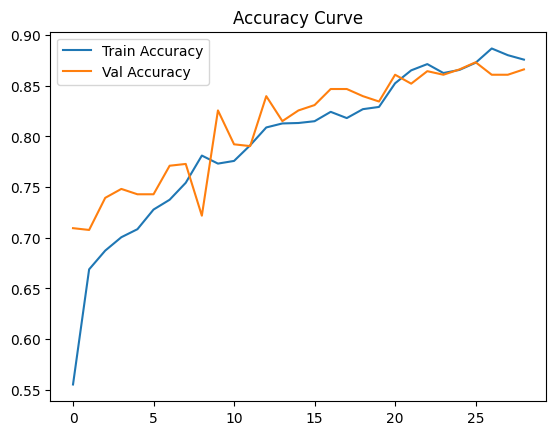

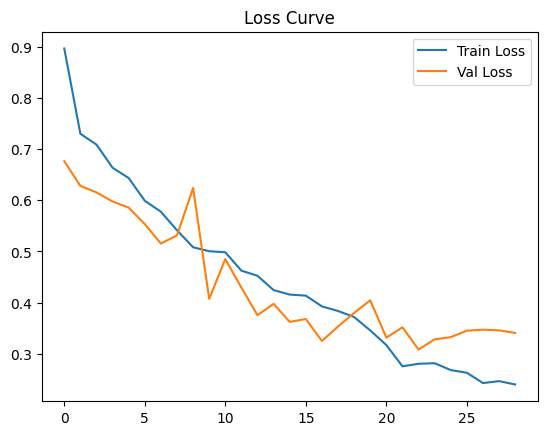

36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 312ms/step


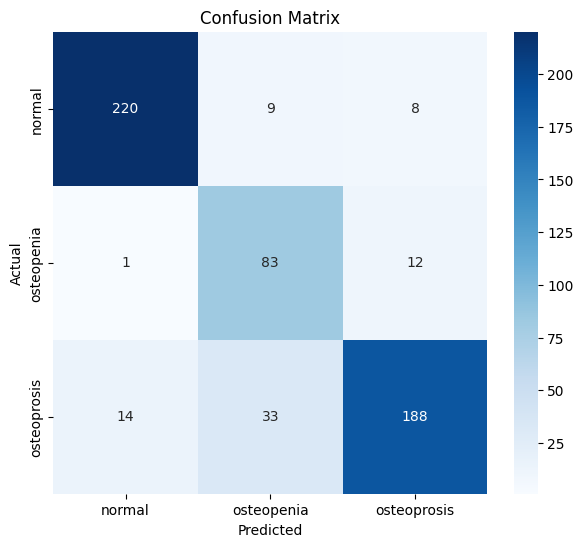

✅ Classification Report:
              precision    recall  f1-score   support

      normal       0.94      0.93      0.93       237
  osteopenia       0.66      0.86      0.75        96
 osteoprosis       0.90      0.80      0.85       235

    accuracy                           0.86       568
   macro avg       0.83      0.86      0.84       568
weighted avg       0.88      0.86      0.87       568



In [5]:
# ==========================================
# 1. IMPORT LIBRARIES
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns

print("✅ TensorFlow Version:", tf.__version__)

# ==========================================
# 2. CONFIGURATION
# ==========================================
SEED = 42
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 40

DATASET_PATH = "/kaggle/input/osteoporosis-dataset/Combined Dataset/Combined Dataset"  
CLASSES = ["normal", "osteopenia", "osteoprosis"]   # ✅ EXACT FOLDER SPELLING

# ==========================================
# 3. LOAD ALL IMAGE PATHS + LABELS
# ==========================================
filepaths = []
labels = []

for class_name in CLASSES:
    class_path = os.path.join(DATASET_PATH, class_name)
    for img in os.listdir(class_path):
        filepaths.append(os.path.join(class_path, img))
        labels.append(class_name)

df = pd.DataFrame({
    "filename": filepaths,
    "class": labels
})

print("✅ Total Images:", len(df))
print("✅ Class Distribution:\n", df["class"].value_counts())

# ==========================================
# 4. STRATIFIED SPLIT (CLASS IMBALANCE SAFE)
# ==========================================
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df["class"],
    random_state=SEED
)

print("✅ Training Samples:", len(train_df))
print("✅ Validation Samples:", len(val_df))

# ==========================================
# 5. CLASS WEIGHT (IMBALANCE HANDLING)
# ==========================================
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_df["class"]),
    y=train_df["class"]
)

class_weight_dict = dict(zip(np.unique(train_df["class"]), class_weights))
print("✅ Class Weights:", class_weight_dict)

# ==========================================
# 6. DATA AUGMENTATION
# ==========================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="filename",
    y_col="class",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col="filename",
    y_col="class",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = len(train_generator.class_indices)
print("✅ Detected Classes:", train_generator.class_indices)

# ==========================================
# 7. LOAD VGG-19 + PARTIAL FINE TUNING
# ==========================================
base_model = VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# ✅ FREEZE MOST LAYERS (DO NOT UNFREEZE FULL MODEL)
for layer in base_model.layers[:-6]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.4)(x)
output = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

# ==========================================
# 8. COMPILE MODEL
# ==========================================
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ==========================================
# 9. CALLBACKS
# ==========================================
callbacks = [
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1)
]

# ==========================================
# 10. TRAIN MODEL
# ==========================================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    callbacks=callbacks,
    class_weight=class_weight_dict
)

# ==========================================
# 11. SAVE MODEL
# ==========================================
model.save("vgg19_osteoporosis_model.h5")
print("✅ Model saved successfully")

# ==========================================
# 12. TRAINING CURVES
# ==========================================
plt.figure()
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()

# ==========================================
# 13. CONFUSION MATRIX + CLASSIFICATION REPORT
# ==========================================
val_generator.reset()
preds = model.predict(val_generator)
y_pred = np.argmax(preds, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
